This notebook analyzes trading diversity (number of partner countries and types of commodities) , and build models to forecast crop export values by countries or globally

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import operator 

In [48]:
# Read in processed data
items_by_country = pd.read_csv('../data/processed/items_by_country.csv',index_col=0)
partners_by_country = pd.read_csv('../data/processed/partners_by_country.csv',index_col=0)
print(items_by_country.shape)
print(partners_by_country.shape)

(223049, 37)
(57838, 36)


In [50]:
items_by_country.head()

,Reporter Countries,Item,Element,Unit,Item Code,Y1986,Y1987,Y1988,Y1989,Y1990,...,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017
0,Afghanistan,Almonds shelled,Export Quantity,tonnes,5313,0.0,0.0,0.0,0.0,0.0,...,0.0,4763.0,1308.0,2261.0,0.0,0.0,2714.0,2086.0,1778.0,2756.0
1,Afghanistan,Almonds shelled,Export Value,1000 US$,5313,0.0,0.0,0.0,0.0,0.0,...,0.0,35476.0,15894.0,20270.0,0.0,0.0,16454.0,12793.0,10934.0,19677.0
2,Afghanistan,Almonds shelled,Import Quantity,tonnes,1617,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,168.0,181.0,846.0,103.0
3,Afghanistan,Almonds shelled,Import Value,1000 US$,1617,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1117.0,1377.0,4988.0,759.0
4,Afghanistan,"Almonds, with shell",Export Quantity,tonnes,3315,0.0,0.0,0.0,0.0,0.0,...,0.0,11066.0,779.0,1016.0,0.0,0.0,1856.0,1660.0,1545.0,875.0


In [51]:
partners_by_country.head()

,Reporter Countries,Partner Countries,Element,Unit,Y1986,Y1987,Y1988,Y1989,Y1990,Y1991,...,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017
1,Afghanistan,Algeria,Export Value,1000 US$,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,27.0,1.0,24.0,5.0
3,Afghanistan,Angola,Export Value,1000 US$,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,Afghanistan,Argentina,Import Value,1000 US$,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,415.0,0.0,0.0,1163.0,159.0,1844.0,1829.0
7,Afghanistan,Armenia,Export Value,1000 US$,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,Afghanistan,Armenia,Import Value,1000 US$,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,48.0,0.0,0.0,282.0,246.0,0.0,67.0


## 1. Inspecting aggregated data and look for potential problems

### 1.1 Find countries with high trading diversity
In terms of number of (1)items and (2)partner countries, respectively

In [3]:
def count_unique(df, col_name, variable):
    '''count unique entries of the variable for col_name (e.g., list of reporter countries).
    Export and Import groups are counted separately'''
    counts = []
    for country in df[col_name].unique():
        count_export = len(df.loc[(df[col_name]== country) & (df['Element'].str.startswith('Export')), variable].unique())
        count_import = len(df.loc[(df[col_name]== country) & (df['Element'].str.startswith('Import')), variable].unique())
        counts.append([country,count_export,count_import])

    count_df = pd.DataFrame(counts, columns=['Countries','Export','Import'])
    
    return count_df

In [4]:
# Count unique Items exported/imported by a country
itemscount_by_country = count_unique(items_by_country,'Reporter Countries','Item')

In [32]:
# Count unique Partners exported/imported with a country
partnerscount_by_country = count_unique(partners_by_country,'Reporter Countries','Partner Countries')

In [69]:
# Show top 10 countries with most numbers of exporting items
itemscount_by_country = itemscount_by_country.sort_values(by='Export',ascending=False)
itemscount_by_country.head(10)

,Countries,Export,Import
132,Poland,370,375
8,Austria,370,370
116,Netherlands,369,369
174,United Kingdom,366,365
63,France,366,365
69,Germany,365,366
173,United Arab Emirates,365,372
86,Italy,364,364
50,Denmark,364,363
15,Belgium,363,362


In [28]:
itemscount_by_country.describe()

,Export,Import
count,184.000000,184.000000
mean,267.788043,332.668478
std,93.621104,36.760841
min,11.000000,112.000000
25%,199.500000,323.000000
50%,306.500000,339.500000
75%,341.000000,356.000000
max,370.000000,376.000000


In [67]:
# Show top 10 countries with most numbers of exporting partners
partnerscount_by_country = partnerscount_by_country.sort_values(by='Export',ascending=False)
partnerscount_by_country.head(10)

,Countries,Export,Import
176,United States of America,238,234
135,Republic of Korea,224,233
161,Switzerland,227,232
32,Canada,232,232
86,Italy,231,229
132,Poland,225,229
155,South Africa,240,227
63,France,230,227
163,Thailand,244,227
88,Japan,210,227


In [35]:
partnerscount_by_country.describe()

,Export,Import
count,184.000000,184.000000
mean,147.663043,166.673913
std,65.005049,44.632956
min,6.000000,34.000000
25%,100.000000,138.500000
50%,158.000000,173.500000
75%,202.000000,200.250000
max,244.000000,234.000000


 **Summary:** There is a big difference in items diversity among countries, as well as in number of trading partner countries

### Visualization 

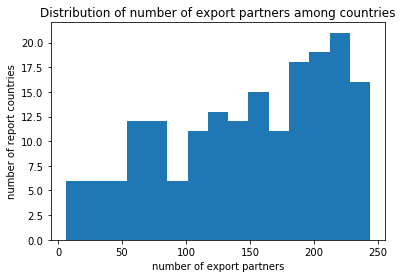

In [110]:
plt.hist(partnerscount_by_country['Export'],bins=15)
plt.title('Distribution of number of export partners among countries')
plt.ylabel('number of report countries')
plt.xlabel('number of export partners')
plt.show()

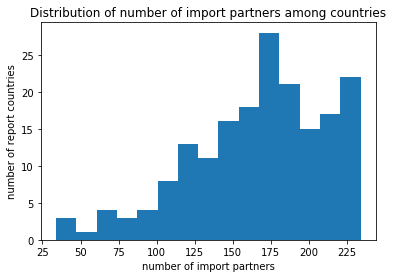

In [111]:
plt.hist(partnerscount_by_country['Import'],bins=15)
plt.title('Distribution of number of import partners among countries')
plt.ylabel('number of report countries')
plt.xlabel('number of import partners')
plt.show()

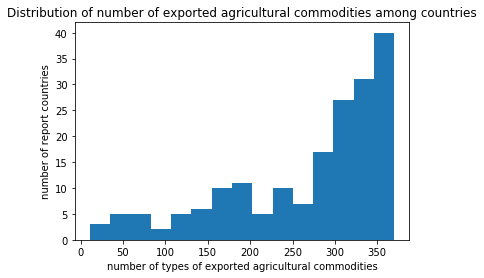

In [112]:
plt.hist(itemscount_by_country['Export'],bins=15)
plt.title('Distribution of number of exported agricultural commodities among countries')
plt.ylabel('number of report countries')
plt.xlabel('number of types of exported agricultural commodities')
plt.show()

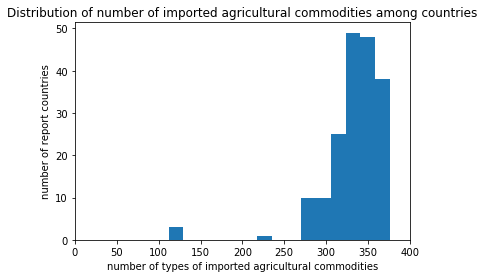

In [115]:
plt.hist(itemscount_by_country['Import'],bins=15)
plt.title('Distribution of number of imported agricultural commodities among countries')
plt.ylabel('number of report countries')
plt.xlabel('number of types of imported agricultural commodities')
plt.xlim(0,400)
plt.show()

In [288]:
# partnerscount_by_country.plot(x='Countries',kind='barh',fontsize= 8, figsize=(10,25))
# plt.xlabel('Number of trading partner countries')
# plt.show()

In [289]:
# itemscount_by_country.plot(x='Countries',kind='barh',fontsize= 8, figsize=(10,25))
# plt.xlabel('Number of types of agricultural commodities traded')
# plt.show()

### 1.2 Rank items and countries by total values traded

#### 1. Find the top five crops in exporting values summed between 1986 and 2017

In [75]:
items_total = items_by_country.drop('Item Code',axis=1).groupby(['Item','Element']).sum().reset_index()

In [76]:
items_total.shape

(1670, 34)

In [77]:
items_total.head()

,Item,Element,Y1986,Y1987,Y1988,Y1989,Y1990,Y1991,Y1992,Y1993,...,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017
0,Alfalfa meal and pellets,Export Quantity,780721.0,674729.0,1281274.0,945720.0,898612.0,1115589.0,1320243.0,1505566.0,...,1141409.0,917478.0,1301256.0,1352509.0,1629006.0,1230975.0,1230904.0,1257591.0,1250588.0,1185340.0
1,Alfalfa meal and pellets,Export Value,85939.0,76271.0,162381.0,124439.0,124086.0,137893.0,158757.0,170117.0,...,283189.0,199680.0,325348.0,338355.0,454384.0,344310.0,335681.0,303085.0,308622.0,316512.0
2,Alfalfa meal and pellets,Import Quantity,747809.0,625348.0,922591.0,878304.0,861054.0,1026067.0,1129702.0,1316800.0,...,1045324.0,722642.0,814707.0,807915.0,862389.0,762030.0,1840831.0,1999653.0,1979886.0,928731.0
3,Alfalfa meal and pellets,Import Value,91413.0,77803.0,119357.0,120259.0,126511.0,134983.0,153154.0,159708.0,...,325525.0,186694.0,192576.0,230616.0,261140.0,256209.0,651632.0,590255.0,522431.0,265593.0
4,Almonds shelled,Export Quantity,100123.0,89685.0,117115.0,125555.0,136050.0,114860.0,152612.0,164122.0,...,469820.0,545526.0,558735.0,624217.0,651907.0,680869.0,691473.0,661657.0,755735.0,777981.0


In [78]:
years = items_total.columns[2:]

In [79]:
years

Index(['Y1986', 'Y1987', 'Y1988', 'Y1989', 'Y1990', 'Y1991', 'Y1992', 'Y1993',
       'Y1994', 'Y1995', 'Y1996', 'Y1997', 'Y1998', 'Y1999', 'Y2000', 'Y2001',
       'Y2002', 'Y2003', 'Y2004', 'Y2005', 'Y2006', 'Y2007', 'Y2008', 'Y2009',
       'Y2010', 'Y2011', 'Y2012', 'Y2013', 'Y2014', 'Y2015', 'Y2016', 'Y2017'],
      dtype='object')

In [80]:
items_total['Sum'] = items_total[years].sum(axis=1)

We shall focus on export quantity and value of crops.

In [89]:
items_total_exportQ = items_total.loc[items_total['Element']=='Export Quantity',:]
items_total_exportV = items_total.loc[items_total['Element']=='Export Value',:]

In [290]:
# Check the top items in export value and select crops
items_total_exportV = items_total_exportV.sort_values(by='Sum',ascending=False)
print(items_total_exportV['Item'][:20])
print(items_total_exportV.shape)

595                              Food prep nes
1635                                     Wheat
1431                                  Soybeans
431                            Crude materials
1647                                      Wine
873                                      Maize
99              Beverages, distilled alcoholic
931       Meat, cattle, boneless (beef & veal)
291                     Cheese, whole cow milk
331                                 Cigarettes
1155                                 Oil, palm
223                             Cake, soybeans
323                     Chocolate products nes
1227                                    Pastry
935                              Meat, chicken
379                              Coffee, green
1347    Rice - total  (Rice milled equivalent)
979                                 Meat, pork
403                                Cotton lint
1371                        Rubber natural dry
Name: Item, dtype: object
(417, 35)


The top five exported crops between 1986 and 2017 (in 1000 US$, not counting processed products) are:   
Wheat, Soybeans, Maize, Coffee, and Cotton

#### 2. Find the top five countries in terms of total exporting values during the past three years

In [106]:
country_total = partners_by_country.groupby(['Reporter Countries','Element']).sum().reset_index()

In [107]:
country_total['3y_mean'] = country_total[['Y2015','Y2016','Y2017']].mean(axis=1)

In [110]:
country_total = country_total.sort_values(by='3y_mean', ascending=False)
country_total_exportV = country_total.loc[country_total['Element']=='Export Value',:]

In [291]:
# Find top countries in exporting values of agricultural goods
print(country_total_exportV['Reporter Countries'][:20])

352    United States of America
232                 Netherlands
138                     Germany
48                       Brazil
126                      France
76              China, mainland
312                       Spain
64                       Canada
172                       Italy
30                      Belgium
326                    Thailand
164                   Indonesia
8                     Argentina
14                    Australia
162                       India
218                      Mexico
348              United Kingdom
264                      Poland
204                    Malaysia
238                 New Zealand
Name: Reporter Countries, dtype: object


The top 5 countries in 3-year average (2015-2017) exporting values of agricultural commodities are:  
USA, Netherlands, Germany, Brazil and France

In [112]:
country_total_exportV.shape

(184, 35)

## 2. Build simple linear regression models on time series data for the top crops and countries

### 2.1 Models for wheat export 

#### 1) Find countries that have more complete data set >50% (16 years) non-zero trading data for wheat

In [114]:
items_by_country.head()

,Reporter Countries,Item,Element,Unit,Item Code,Y1986,Y1987,Y1988,Y1989,Y1990,...,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017
0,Afghanistan,Almonds shelled,Export Quantity,tonnes,5313,0.0,0.0,0.0,0.0,0.0,...,0.0,4763.0,1308.0,2261.0,0.0,0.0,2714.0,2086.0,1778.0,2756.0
1,Afghanistan,Almonds shelled,Export Value,1000 US$,5313,0.0,0.0,0.0,0.0,0.0,...,0.0,35476.0,15894.0,20270.0,0.0,0.0,16454.0,12793.0,10934.0,19677.0
2,Afghanistan,Almonds shelled,Import Quantity,tonnes,1617,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,168.0,181.0,846.0,103.0
3,Afghanistan,Almonds shelled,Import Value,1000 US$,1617,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1117.0,1377.0,4988.0,759.0
4,Afghanistan,"Almonds, with shell",Export Quantity,tonnes,3315,0.0,0.0,0.0,0.0,0.0,...,0.0,11066.0,779.0,1016.0,0.0,0.0,1856.0,1660.0,1545.0,875.0


In [118]:
# Calculate number of years with non-zero trading data
items_by_country['NoneZero'] = 32 - (items_by_country[years] == 0).sum(axis=1)

In [131]:
# Select countries with >= 16 years of wheat export data
wheat_export_value = items_by_country.loc[(items_by_country['Item']=='Wheat')&(items_by_country['Element']=='Export Value'),:]
wheat_export_value_50 = wheat_export_value.loc[wheat_export_value['NoneZero']>=16,:]
print(wheat_export_value_50.shape)
wheat_export_value_50.head()

# 75 countries were selected

(75, 38)


,Reporter Countries,Item,Element,Unit,Item Code,Y1986,Y1987,Y1988,Y1989,Y1990,...,Y2009,Y2010,Y2011,Y2012,Y2013,Y2014,Y2015,Y2016,Y2017,NoneZero
5830,Argentina,Wheat,Export Value,1000 US$,1830,374614.0,351003.0,355226.0,657540.0,870936.0,...,1001973.0,901824.0,2508660.0,2937806.0,725395.0,603675.0,1032847.0,1867747.0,2361856.0,32
9409,Australia,Wheat,Export Value,1000 US$,1770,1837595.0,1369375.0,1066732.0,1382707.0,1664054.0,...,3254699.0,3845506.0,5709040.0,6765445.0,5895653.0,5343407.0,4371505.0,3621345.0,4650327.0,32
10905,Austria,Wheat,Export Value,1000 US$,1185,32330.0,40372.0,78313.0,79656.0,53462.0,...,144764.0,202892.0,248774.0,205418.0,205738.0,290428.0,236625.0,192220.0,195575.0,32
17128,Barbados,Wheat,Export Value,1000 US$,135,1.0,0.0,0.0,0.0,291.0,...,1.0,1.0,18.0,15.0,76.0,37.0,0.0,0.0,1.0,19
18465,Belarus,Wheat,Export Value,1000 US$,135,0.0,0.0,0.0,0.0,0.0,...,24.0,746.0,211.0,194.0,240.0,280.0,4934.0,11986.0,180.0,19


In [129]:
print(wheat_export_value_50.sort_values(by='Y2017',ascending=False)['Reporter Countries'][:10])

214508    United States of America
169076          Russian Federation
40138                       Canada
9409                     Australia
77138                       France
208674                     Ukraine
5830                     Argentina
83516                      Germany
167644                     Romania
33153                     Bulgaria
Name: Reporter Countries, dtype: object


#### 2) data preprocessing 

In [293]:
# Reshape data from wide to long by years 
wheat_long = wheat_export_value_50.melt(['Reporter Countries'],years,'year','value')

In [294]:
wheat_long.head()

,Reporter Countries,year,value
0,Argentina,Y1986,374614.0
1,Australia,Y1986,1837595.0
2,Austria,Y1986,32330.0
3,Barbados,Y1986,1.0
4,Belarus,Y1986,0.0


In [164]:
# Convert df to time series
wheat_long['year'] = wheat_long['year'].map(lambda x: x.lstrip('Y')) # strip Y from year names for easy converting to ts
wheat_long.year = pd.to_datetime(wheat_long.year, unit='Y')

In [165]:
wheat_long.head()

,Reporter Countries,year,value
0,Argentina,1986-01-01,374614.0
1,Australia,1986-01-01,1837595.0
2,Austria,1986-01-01,32330.0
3,Barbados,1986-01-01,1.0
4,Belarus,1986-01-01,0.0


In [208]:
# Reshape data from long to wide, by countries
wheat_wide = wheat_long.pivot(index='year',columns='Reporter Countries',values='value')

In [209]:
wheat_wide.head()

Reporter Countries,Argentina,Australia,Austria,Barbados,Belarus,Belgium,Brazil,Bulgaria,Canada,Chile,...,Turkey,Uganda,Ukraine,United Kingdom,United Republic of Tanzania,United States of America,Uruguay,Yemen,Zambia,Zimbabwe
year,,,,,,,,,,,,,,,,,,,,,
1986-01-01,374614.0,1837595.0,32330.0,1.0,0.0,0.0,0.0,41970.0,2030112.0,10.0,...,1836.0,0.0,0.0,539790.0,0.0,2996911.0,0.0,0.0,0.0,0.0
1987-01-01,351003.0,1369375.0,40372.0,0.0,0.0,0.0,0.0,0.0,2409105.0,2421.0,...,28298.0,0.0,0.0,436869.0,0.0,3024544.0,0.0,0.0,0.0,8.0
1988-01-01,355226.0,1066732.0,78313.0,0.0,0.0,0.0,0.0,63101.0,3596008.0,18.0,...,173522.0,0.0,0.0,246768.0,0.0,4858495.0,0.0,0.0,0.0,0.0
1989-01-01,657540.0,1382707.0,79656.0,0.0,0.0,0.0,0.0,0.0,2173767.0,25.0,...,67682.0,0.0,0.0,462332.0,0.0,5905543.0,24194.0,0.0,0.0,0.0
1990-01-01,870936.0,1664054.0,53462.0,291.0,0.0,0.0,0.0,0.0,2847737.0,356.0,...,4382.0,0.0,0.0,746334.0,0.0,3866314.0,22861.0,0.0,0.0,0.0


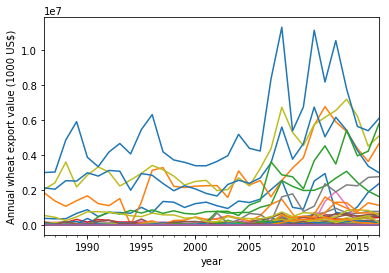

In [300]:
# Visualize data by countries 
# This data now contains zeros (potential missing values)
wheat_wide.plot(legend=False)
#plt.title('Annual wheat export value by countries (1986 - 2017)')
plt.ylabel('Annual wheat export value (1000 US$)')
plt.show()

### Q: interpolate zeors or not? 
zeros are not necessary missing values


In [211]:
# # Interpolate outliers
# wheat_wide = wheat_wide.replace(0,np.nan) # Replace zeros with nans

# # Interpolate use linear method
# wheat_wide_interp = wheat_wide.interpolate('linear')
# wheat_wide_interp.head()

#### 3) Linear regression model with raw time series data (baseline model)

In [230]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score

In [246]:
# Randomly select a country as y, the rest countries as X 
# Use countries in X to predict the wheat export of country in y at a timestamp
country = wheat_wide.sample(1,axis=1, random_state=1)
country.head()

Reporter Countries,Finland
year,
1986-01-01,5019.0
1987-01-01,10491.0
1988-01-01,438.0
1989-01-01,8460.0
1990-01-01,3401.0


In [249]:
countries = wheat_wide.drop(y, axis=1)

In [267]:
X = countries.values
y = country.values
print(X.shape)
print(y.shape)

(32, 74)
(32, 1)


In [268]:
# Cross validation
scores = cross_val_score(Ridge(), X, y, cv=3)
print(scores)

[ -2.34403782 -12.55944393  -8.59755274]


### Problem: too few data points per sample (country)

In [269]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                                    train_size=.6, shuffle=False, random_state=1)

model = Ridge()
model.fit(X_train,y_train)
predictions = model.predict(X_test)
score = r2_score(y_test,predictions)
print(score)

-4.159187817069363


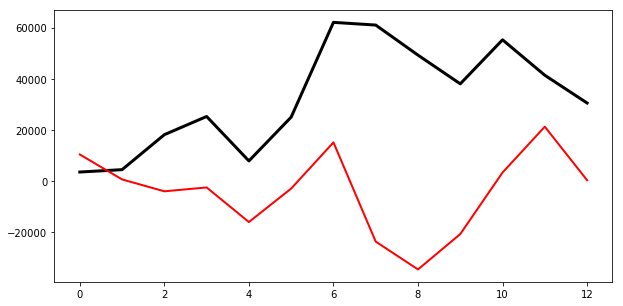

In [287]:
# Visualize prediction results
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(y_test, color='k', lw=3)
ax.plot(predictions, color='r', lw=2)
plt.show()

Summary: Baseline model performance is very poor. Next will need to do feature engineering to improve predictions. Clustering time series among countries may also help.

### Q : different ways to frame the question (and thus different modeling approaches), or ask different questions?
### The potential goal is to eventually being able to forecast wheat export for specific countries such as top exporters, or to forecast global wheat export. 